# LangSmith Tutorial: Building an Advanced Flashcards Generator From Text Input Wit LangSmith

## Table of contents

1. Why LangSmith?
2. LangSmith vs. LangChain
3. Setting up LangSmith
4. LangSmith platform overview
5. Getting started with LangSmith Python SDK
   1. Setting up tracing
   2. Creating a LangSmith client and running an initial prompt
   3. Creating an unlabeled dataset in LangSmith
6. Evaluating LLMs in LangSmith
   1. Basic evaluation types for unlabeled datasets
   2. Creating labeled datasets from various sources
   3. Writing custom evaluations
7. Conclusion

## Introduction

I recently found an AI platform that automatically generates flashcards from any type of media. Since I love memorizing things with spaced repetition, I immediately uploaded my XGBoost tutorial and asked the AI to create 50 flashcards on it. 

But... I was disappointed. Most of the questions were too easy and very few of them were about code syntax. Even more strangely, 10% of the questions were identical - "What is the capital of France?" (Yep, right in the middle of an XGBoost tutorial). 

These types of embarrassing mistakes aren't the fault of the LLM behind the platform or not even the fault of the developers (well, partly) because we didn't have a reliable way of evaluating LLM outputs in production. Until just recently...

LangSmith is a full-fledged platform to build and deploy LLM applications. Perhaps, its most important feature is LLM output evaluation and performance monitoring. In this tutorial, we will see both LangSmith platform and Python framework in action by building our own flashcards generator. 

Let's get started!

Right now, there are over 300k GPTs in GPT store and unfortunately, most of them don't work as expected. The model behind them is still GPT-4, a general purpose large language model. Fine-tuning it to niche use-cases beyond rap lyrics generation and content writing requires tremendous effort. 

Fine-tuning LLMs to niche use-cases requires great effort - that's so using clever and sneaky prompting isn't enough to do the task exactly as you'd 

Over 300k gpts in gpt store.
Most of them don't work as expected even though powered by gpt-4
we are not seeing gpts going viral
The reason is generic gpts are unreliable. 
The model behind them is general purpose
Fine-tuning their outputs, narrowing down their responses to specific niches are not easy
Gpts can't do this. They can't verify their own output.
Once output is out, it is displayed to the user
To improve the output, user either has to say the gpt made a mistake and hope for the best that it understands its fault and fixes it
That's why LangSmith is gaining so much popularity
It is an end-to-end platform for building, testing and deploying LLM applications. 
This tutorial covers how to build an LLM application using it

## Why LangSmith?

LangSmith is a comprehensive platform to build and deploy large language applications. Here are some of its features and tangible real-world benefits they bring:

1. Quick setup

Programmers can start experimenting with LangSmith in minutes, not hours. This means a small team or a solo developer can prototype an AI application over a weekend and potentially ship a paid service by Monday.

2. Quality assurance

With rigorous evaluation tools, companies can avoid the embarrassment and cost of faulty AI releases. 

Comprehensive solution to build LLMs
Here are the benefits LangSmith brings

Quick Setup: Developers can start experimenting with AI in minutes, not hours. This means a small team or solo developer can prototype an AI chatbot over a weekend, potentially opening up new customer service channels by Monday.

Rapid Development: Teams can push out AI features faster, reducing time from concept to deployment. Imagine launching a smart recommendation system for your e-commerce site weeks earlier than planned, boosting sales with personalized shopping experiences.

Quality Assurance: With rigorevaluationting tools, companies can avoid the embarrassment and cost of faulty AI releases. A retail app could ensure its sizing advice AI works flawlessly across thousands of products, saving on returns and customer coises.

tsntReal-time monitoring and visualizaance: Real-time insights let developers fine-tune applications on the fly. If an online learning platform’s AI tutor starts misinterpreting student inputs, it can be corrected quickly, ensuring continuous and effective learning  runs, outputs, parameters, latency, token count, etc. sun track.

Precision Tuning: The ability to refine AI becustom evaluators written in natural languageman insights means creating applicactually does what user promptsdmmendations.

## LangSmith vs. LangChain


LangSmith is a platform for testing and optimizing AI applications, focusing on quality assurance through testing, evaluation, and model tuning. It's tailored for ensuring AI behaves as intended before deployment. Key features include easy setup, advanced evaluation tools, and a community hub for shared insights.

LangChain, conversely, is an open-source framework aimed at building AI applications by integrating LLMs. It's designed for the development phase, facilitating the creation of intelligent systems with capabilities for debugging and operational tracing.

In essence, while LangChain is for building AI with LLMs, enhancing development with modular integration and intelligent agent creation, LangSmith ensures these AI systems are polished, performant, and ready for real-world application, providing a suite for rigorous testing and refinement post-development. Together, they form a full cycle toolset for AI application creation and optimization.

## Setting up LangSmith

smith.langchain.com

```
pip install -U langsmith
pip install python-dotenv
```

In [5]:
import warnings

from dotenv import find_dotenv, load_dotenv
from langchain.chat_models import ChatOpenAI
from langsmith import Client

warnings.filterwarnings("ignore")

In [2]:
import os

load_dotenv(find_dotenv())
os.environ["LANGCHAIN_API_KEY"] = str(os.getenv("LANGCHAIN_API_KEY"))
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "flashcards-generator"

In [10]:
# Initialize a client
client = Client()

llm = ChatOpenAI()  # Uses gpt-3.5-turbo by default
llm.invoke("Hello, chatty, how you doin' today?")

AIMessage(content="Hello! I'm an AI language model, so I don't have feelings, but thank you for asking! How can I assist you today?")

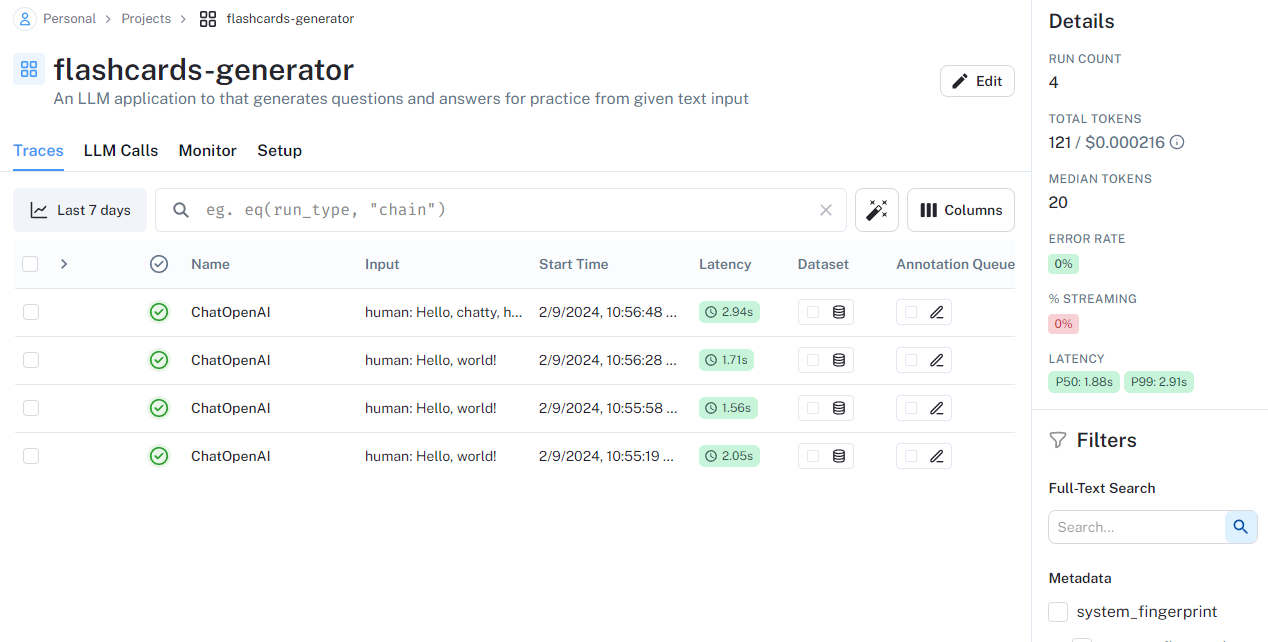

![](images/first_run.gif)

In [12]:
message = llm.invoke("Do you know how to generate flashcards?")
message.content

'Yes, I can help you generate flashcards. There are several ways to create flashcards:\n\n1. Online Flashcard Generators: There are various websites and apps available that allow you to create flashcards digitally. Some popular options include Quizlet, Anki, and Cram. These platforms provide templates and tools to input your content and generate flashcards.\n\n2. Word Processing or Presentation Software: You can use software like Microsoft Word, Google Docs, or PowerPoint to create flashcards. Simply create a new document or slide for each flashcard and add the question or term on one side and the answer or definition on the other side.\n\n3. Handwritten Flashcards: If you prefer a more traditional approach, you can create flashcards by hand. Use index cards or small pieces of paper, write the question or term on one side, and the answer or definition on the other side.\n\nRemember, the key to effective flashcards is to keep them concise and focused. Use bullet points, keywords, or sho

In [13]:
prompt = f"Summarize this text: {message.content}"

summary = llm.invoke(prompt)
summary.content

'This text explains three different ways to create flashcards: using online flashcard generators, using word processing or presentation software, and creating them by hand. It emphasizes the importance of keeping flashcards concise and focused, using bullet points or short phrases, and incorporating visual aids to enhance memory retention.'

Focus how the suggestion states the cards should be concise and focused

## LangSmith platform overview

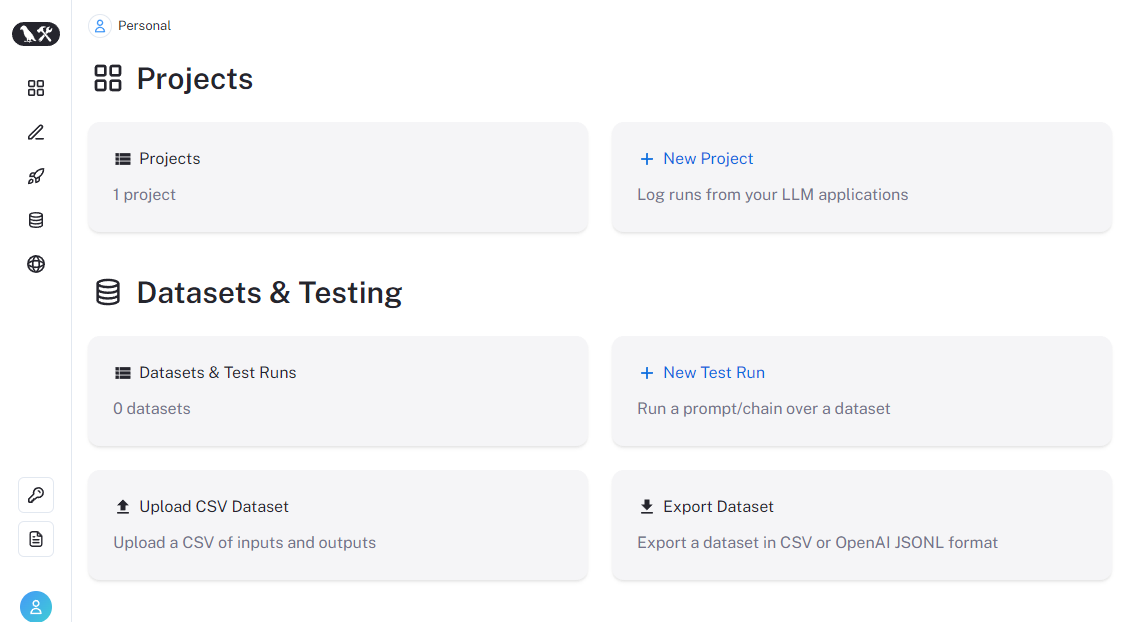

After clicking submit

![](images/creating_projects.gif)

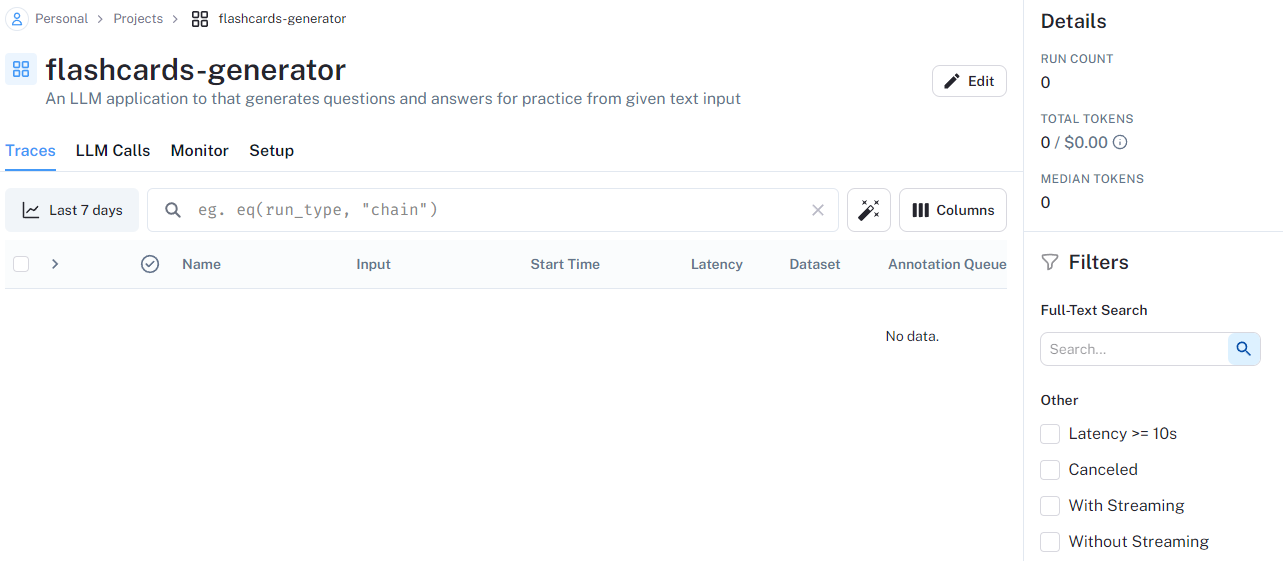

## Getting started with LangSmith Python SDK

### Setting up tracing

### Creating a LangSmith client and running an initial prompt

### Creating an unlabeled dataset in LangSmith

Datasets are a collections of examples that can be used to evaluate or otherwise improve a chain, agent, or model. Examples are rows in the dataset, containing the inputs and (optionally) expected outputs for a given interaction. Below we will go over the current types of datasets as well as different ways to create them.

In [22]:
# Create a blank dataset
dataset_name = "deep_learning_fundamentals"

# Creating a dataset
dl_dataset = client.create_dataset(
    dataset_name=dataset_name,
    description="A deck containing flashcards on NNs and PyTorch",
)

In [23]:
# Storing only inputs into a dataset
example_inputs = [
    "Generate three flashcards on neural networks theory",
    "Generate three flashcards on how to create PyTorch models",
    "Generate three flashcards on how to evaluate PyTorch models",
]

for ex in example_inputs:
    # Each example input must be unique
    # The output is optional
    client.create_example(
        inputs={"input": ex},
        outputs={"output": None},
        dataset_id=dl_dataset.id,
    )

![](images/first_dataset.gif)

## Evaluating LLMs in LangSmith

OK, we've got three example prompts (examples) and we expect the LLM to return three flashcards for each. But how do we make sure that the model returns exactly three? Also, how do we force the format of questions generated into a schema? These are all problems we can solveby using evaluators in LangSmith.

We have no example outputs for example inputs, so we are kind of shooting in the dark. 

In [39]:
from langchain.smith import RunEvalConfig, run_on_dataset

# List the eval criteria
eval_config = RunEvalConfig(
    evaluators=[
        RunEvalConfig.Criteria("conciseness"),
    ]
)

run_on_dataset(
    client=client,
    dataset_name=dataset_name,
    llm_or_chain_factory=llm,
    evaluation=eval_config,
)

View the evaluation results for project 'sunny-book-50' at:
https://smith.langchain.com/o/c50fc75b-a85e-5392-9845-1fd128ea9489/datasets/62738028-4cec-4afa-a668-6fb5c958d0af/compare?selectedSessions=70b0de52-d719-4dd4-8203-3b94b6c0d75c

View all tests for Dataset deep_learning_fundamentals at:
https://smith.langchain.com/o/c50fc75b-a85e-5392-9845-1fd128ea9489/datasets/62738028-4cec-4afa-a668-6fb5c958d0af
[------------------------------------------------->] 3/3

{'project_name': 'sunny-book-50',
 'results': {'fa7135d9-4bce-42cc-a694-09708449913c': {'input': {'input': 'Generate three flashcards on how to evaluate PyTorch models'},
   'feedback': [EvaluationResult(key='conciseness', score=1, value='Y', comment='The criterion for this task is conciseness. This means the submission should be brief, to the point, and without unnecessary details or explanations.\n\nLooking at the submission, the AI has generated three flashcards on how to evaluate PyTorch models. Each flashcard is clear, direct, and provides the necessary information without going into unnecessary details.\n\nFlashcard 1 succinctly explains the purpose of evaluating PyTorch models. Flashcard 2 provides a brief overview of the common evaluation metrics for PyTorch models. Flashcard 3 explains how to evaluate PyTorch models using cross-validation in a concise manner.\n\nTherefore, the submission meets the criterion of conciseness.\n\nY', correction=None, evaluator_info={'__run': RunIn

In [34]:
from langchain.evaluation import Criteria

# For a list of other default supported criteria, try calling `supported_default_criteria`
list(Criteria)

[<Criteria.CONCISENESS: 'conciseness'>,
 <Criteria.RELEVANCE: 'relevance'>,
 <Criteria.CORRECTNESS: 'correctness'>,
 <Criteria.COHERENCE: 'coherence'>,
 <Criteria.HARMFULNESS: 'harmfulness'>,
 <Criteria.MALICIOUSNESS: 'maliciousness'>,
 <Criteria.HELPFULNESS: 'helpfulness'>,
 <Criteria.CONTROVERSIALITY: 'controversiality'>,
 <Criteria.MISOGYNY: 'misogyny'>,
 <Criteria.CRIMINALITY: 'criminality'>,
 <Criteria.INSENSITIVITY: 'insensitivity'>,
 <Criteria.DEPTH: 'depth'>,
 <Criteria.CREATIVITY: 'creativity'>,
 <Criteria.DETAIL: 'detail'>]

### Basic evaluators for unlabeled datasets

### Creating labeled datasets from various sources

### Writing custom evaluators

## Conclusion